<a href="https://colab.research.google.com/github/dongminkim0220/pytorch_tutorial/blob/master/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Models

PyTorch Tutorial 07 - Linear Regression
https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7

PyTorch Tutorial 08 - Logistic Regression

https://www.youtube.com/watch?v=OGpQxIkR4ao&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=8

## Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

0. prepare data

In [4]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

In [5]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [11]:
X[0]

tensor([-0.6118])

In [12]:
y[0]

tensor([-55.5386])

In [6]:
X.shape

torch.Size([100, 1])

In [7]:
y.shape

torch.Size([100])

In [8]:
y = y.view(y.shape[0], 1)

In [9]:
y.shape

torch.Size([100, 1])

In [10]:
n_samples, n_features = X.shape

1. model

In [17]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

2. loss and optimizer

In [18]:
learning_rate = 0.01

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

3. training loop

epoch: 10, loss = 4308.0000
epoch: 20, loss = 3215.6621
epoch: 30, loss = 2425.3384
epoch: 40, loss = 1852.9142
epoch: 50, loss = 1437.9014
epoch: 60, loss = 1136.7373
epoch: 70, loss = 918.0051
epoch: 80, loss = 759.0181
epoch: 90, loss = 643.3748
epoch: 100, loss = 559.2029


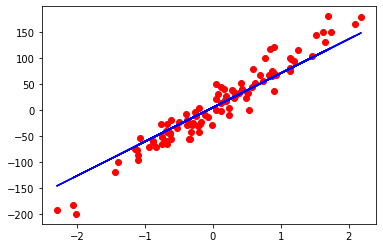

In [20]:
num_epochs = 100
for epoch in range(num_epochs):
  # forward, loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward
  loss.backward()
  
  # update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")


predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")

## Logistic Regression

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

0. prepare data

In [22]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [23]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [24]:
y[0]

0

In [25]:
X.shape

(569, 30)

In [26]:
y.shape

(569,)

In [27]:
n_sample, n_features = X.shape

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

scale

In [48]:
sc = StandardScaler() # zero mean, and unit variance

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [51]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

1. Model: f = wx + b, sigmoid at the end

In [52]:
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [53]:
model = LogisticRegression(n_features)

2. loss and optimizer

In [54]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

3. training loop

In [55]:
num_epochs = 100

In [59]:
for epoch in range(1, num_epochs+1):
  # forward, loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward
  loss.backward()

  # updates
  optimizer.step()

  # zero grad
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item():.4f}")

# eval
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f"accuracy = {acc:.4f}")

epoch: 10, loss: 0.1403
epoch: 20, loss: 0.1384
epoch: 30, loss: 0.1366
epoch: 40, loss: 0.1348
epoch: 50, loss: 0.1331
epoch: 60, loss: 0.1315
epoch: 70, loss: 0.1300
epoch: 80, loss: 0.1285
epoch: 90, loss: 0.1271
epoch: 100, loss: 0.1257
accuracy = 0.9211
